In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from urllib.request import urlretrieve
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[2],
                    'pcm-avg-temp': values[3],
                    'iters-per-timestep': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[8],
                    'nussult-number-nshadow': values[6],
                    'nusult-number': values[7],
                    'flux-combined': values[9],
                    'heat-storage-rate-flux': values[10],
                    'htf-avg-temp': values[11]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = 'base1.out'  # Replace with your text file path
output_file_path = 'simulation_report_base1.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file2= pd.read_csv('simulation_report_base1.csv')

print(f"Data has been written to {output_file_path}")
my_file2
      


Data has been written to simulation_report_base1.csv


Time Step flow-time       area-q       pcm-avg-temp iters-per-timestep  \
0        ("Time     Step"  "flow-time"           "area-q"     "pcm-avg-temp"   
1             0         0            0                300                 10   
2             1       0.1            0  300.0014559368333                 47   
3             2       0.2            0  300.0054672777745                 47   
4             3       0.3            0  300.0095721494073                 47   
...         ...       ...          ...                ...                ...   
26326     26325    2632.5            1  352.4955101868293                  1   
26327     26326    2632.6            1  352.4956520999597                  1   
26328     26327    2632.7            1  352.4957939623754                  1   
26329     26328    2632.8            1  352.4959357741337                  1   
26330     26329    2632.9            1  352.4960775347806                  1   

          heat-storage-rate temp-uniformity-index nussult-number-nshadow  \
0      "iters-per-timestep"       "nusult-number"    "heat-storage-rate"   
1                         0                     0                      0   
2         1532.475527184208  0.000192557212282165      44.90921989356358   
3         2776.026867864234  0.001106577861081909      78.52314340921797   
4         3588.158210672301  0.002280496728285385      98.73620806979491   
...                     ...                   ...                    ...   
26326   0.03531037054872611    0.4607384264631477     -1607.067953835333   
26327   0.03513408050901659    0.4606620813049478     -1607.072718911713   
26328   0.03531907158606875    0.4605857454817088     -1607.130050983656   
26329   0.03521415961016775    0.4605094191244711     -1607.128558803515   
26330   0.03534875631487763    0.4604331027594222     -1607.192727719422   

                  nusult-number            flux-combined  \
0      "nussult-number-nshadow"  "temp-uniformity-index"   
1                             0                        0   
2             22.45460994678179    -0.001866644311419918   
3             39.26157170460898     0.002626908793885718   
4             49.36810403489745    -0.004953730458453265   
...                         ...                      ...   
26326        -803.5339769176665    1.372173392744092e-06   
26327        -803.5363594558564   -2.330405676209679e-06   
26328        -803.5650254918281    1.312591431074095e-06   
26329        -803.5642794017574    -2.17234581881276e-06   
26330        -803.5963638597108    1.220430286025254e-06   

      heat-storage-rate-flux              htf-avg-temp  
0            "flux-combined"  "heat-storage-rate-flux"  
1                          0         300.0000000000001  
2          30.75629740324894         302.3752004477129  
3          57.71688331693058         304.6772487371032  
4          76.02305242904269         306.1787877455009  
...                      ...                       ...  
26326     0.2082543483741474         352.9936810901014  
26327     0.2081763492377479         352.9936832298428  
26328     0.2081068732844476         352.9936854071997  
26329     0.2080302917968028         352.9936875396892  
26330     0.2079598546844971         352.9936897083946  

[26331 rows x 12 columns]

In [3]:

my_file2= my_file2.iloc[1:].reset_index(drop=True)

my_file2['flow-time']= my_file2['flow-time'].astype(float)
my_file2['area-q']= my_file2['area-q'].astype(float)
my_file2['Time Step']= my_file2['Time Step'].astype(float)


my_file2['pcm-avg-temp']= my_file2['pcm-avg-temp'].astype(float)
my_file2['heat-storage-rate']= my_file2['heat-storage-rate'].astype(float)
my_file2['temp-uniformity-index']= my_file2['temp-uniformity-index'].astype(float)
my_file2['nussult-number-nshadow']= my_file2['nussult-number-nshadow'].astype(float)
my_file2['nusult-number']= my_file2['nusult-number'].astype(float)
my_file2['flux-combined']= my_file2['flux-combined'].astype(float)
my_file2['heat-storage-rate-flux']= my_file2['heat-storage-rate-flux'].astype(float)
my_file2['htf-avg-temp']= my_file2['htf-avg-temp'].astype(float)

my_file2= my_file2[my_file2['area-q'] < 1]
my_file2['heat-storage-rate-avg']= my_file2['heat-storage-rate-flux'].cumsum()/my_file2['Time Step']
my_file2['temp-diff'] = my_file2['htf-avg-temp'] - my_file2['pcm-avg-temp']
my_file2['mean temp diff'] =my_file2['temp-diff'].cumsum()/my_file2['Time Step']

my_file2

Time Step  flow-time  area-q  pcm-avg-temp iters-per-timestep  \
0            0.0        0.0     0.0    300.000000                 10   
1            1.0        0.1     0.0    300.001456                 47   
2            2.0        0.2     0.0    300.005467                 47   
3            3.0        0.3     0.0    300.009572                 47   
4            4.0        0.4     0.0    300.017278                 47   
...          ...        ...     ...           ...                ...   
23399    23399.0     2339.9     1.0    351.710701                  1   
23400    23400.0     2340.0     1.0    351.711166                  1   
23401    23401.0     2340.1     1.0    351.711631                  1   
23402    23402.0     2340.2     1.0    351.712096                  1   
23403    23403.0     2340.3     1.0    351.712561                  1   

       heat-storage-rate  temp-uniformity-index  nussult-number-nshadow  \
0               0.000000               0.000000                0.000000   
1            1532.475527               0.000193               44.909220   
2            2776.026868               0.001107               78.523143   
3            3588.158211               0.002280               98.736208   
4            4591.045101               0.005051              120.716283   
...                  ...                    ...                     ...   
23399           0.128040               0.673578            -1458.717464   
23400           0.127016               0.673510            -1458.785342   
23401           0.127880               0.673441            -1458.873835   
23402           0.126719               0.673372            -1458.944834   
23403           0.127673               0.673304            -1459.031211   

       nusult-number  flux-combined  heat-storage-rate-flux  htf-avg-temp  \
0           0.000000       0.000000                0.000000    300.000000   
1          22.454610      -0.001867               30.756297    302.375200   
2          39.261572       0.002627               57.716883    304.677249   
3          49.368104      -0.004954               76.023052    306.178788   
4          60.358141       0.004081               99.658314    308.138069   
...              ...            ...                     ...           ...   
23399    -729.358732       0.000005                0.684538    352.980405   
23400    -729.392671      -0.000007                0.684242    352.980412   
23401    -729.436918       0.000006                0.683985    352.980420   
23402    -729.472417      -0.000008                0.683687    352.980428   
23403    -729.515605       0.000006                0.683432    352.980435   

       heat-storage-rate-avg     temp-diff  mean temp diff  
0                        NaN  1.136868e-13             inf  
1                  30.756297  2.373745e+00        2.373745  
2                  44.236590  4.671781e+00        3.522763  
3                  54.832078  6.169216e+00        4.404914  
4                  66.038637  8.120792e+00        5.333883  
...                      ...           ...             ...  
23399               8.164672  1.269704e+00       12.727431  
23400               8.164353  1.269246e+00       12.726942  
23401               8.164033  1.268789e+00       12.726452  
23402               8.163713  1.268331e+00       12.725962  
23403               8.163394  1.267874e+00       12.725473  

[23404 rows x 15 columns]

In [105]:
my_file2['temp-diff'] = my_file2['htf-avg-temp'] - my_file2['pcm-avg-temp']
my_file2['mean temp diff'] =my_file2['temp-diff'].cumsum()/my_file2['Time Step']

In [106]:
my_file2

Time Step  flow-time  area-q  pcm-avg-temp iters-per-timestep  \
0            0.0        0.0     0.0    300.000000                 10   
1            1.0        0.1     0.0    300.001456                 47   
2            2.0        0.2     0.0    300.005467                 47   
3            3.0        0.3     0.0    300.009572                 47   
4            4.0        0.4     0.0    300.017278                 47   
...          ...        ...     ...           ...                ...   
23399    23399.0     2339.9     1.0    351.710701                  1   
23400    23400.0     2340.0     1.0    351.711166                  1   
23401    23401.0     2340.1     1.0    351.711631                  1   
23402    23402.0     2340.2     1.0    351.712096                  1   
23403    23403.0     2340.3     1.0    351.712561                  1   

       heat-storage-rate  temp-uniformity-index  nussult-number-nshadow  \
0               0.000000               0.000000                0.000000   
1            1532.475527               0.000193               44.909220   
2            2776.026868               0.001107               78.523143   
3            3588.158211               0.002280               98.736208   
4            4591.045101               0.005051              120.716283   
...                  ...                    ...                     ...   
23399           0.128040               0.673578            -1458.717464   
23400           0.127016               0.673510            -1458.785342   
23401           0.127880               0.673441            -1458.873835   
23402           0.126719               0.673372            -1458.944834   
23403           0.127673               0.673304            -1459.031211   

       nusult-number  flux-combined  heat-storage-rate-flux  htf-avg-temp  \
0           0.000000       0.000000                0.000000    300.000000   
1          22.454610      -0.001867               30.756297    302.375200   
2          39.261572       0.002627               57.716883    304.677249   
3          49.368104      -0.004954               76.023052    306.178788   
4          60.358141       0.004081               99.658314    308.138069   
...              ...            ...                     ...           ...   
23399    -729.358732       0.000005                0.684538    352.980405   
23400    -729.392671      -0.000007                0.684242    352.980412   
23401    -729.436918       0.000006                0.683985    352.980420   
23402    -729.472417      -0.000008                0.683687    352.980428   
23403    -729.515605       0.000006                0.683432    352.980435   

       heat-storage-rate-avg     temp-diff  mean temp diff  
0                        NaN  1.136868e-13             inf  
1                  30.756297  2.373745e+00        2.373745  
2                  44.236590  4.671781e+00        3.522763  
3                  54.832078  6.169216e+00        4.404914  
4                  66.038637  8.120792e+00        5.333883  
...                      ...           ...             ...  
23399               8.164672  1.269704e+00       12.727431  
23400               8.164353  1.269246e+00       12.726942  
23401               8.164033  1.268789e+00       12.726452  
23402               8.163713  1.268331e+00       12.725962  
23403               8.163394  1.267874e+00       12.725473  

[23404 rows x 15 columns]

In [5]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '3by12.out'  # Replace with your text file path
output_file_path = 'simulation_report_3by12.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file32= pd.read_csv('simulation_report_3by12.csv')

print(f"Data has been written to {output_file_path}")
my_file32
      


Data has been written to simulation_report_3by12.csv


Time Step flow-time             area-q        pcm-avg-temp  \
0        ("Time     Step"                "q"             "t-avg"   
1             0         0  299.9999999999998                   0   
2             1       0.1   300.002478111911   31.30248776202576   
3             2       0.2  300.0096196514557    55.1130617980812   
4             3       0.3  300.0170778591963   70.45997218505917   
...         ...       ...                ...                 ...   
29997     29996    2999.6  352.9084603845597  -984.7014830893386   
29998     29997    2999.7  352.9084839653847  -984.6974877815589   
29999     29998    2999.8  352.9085075395918  -984.7004232970098   
30000     29999    2999.9  352.9085311071778  -984.6964405306392   
30001     30000      3000  352.9085546681483  -984.6994573387309   

        heat-storage-rate   temp-uniformity-index      nusult-number  \
0        "nussult-number"             "htf-t-avg"             "flux"   
1                       0                       0                300   
2       62.60497552405152  -0.0001114954811569646  303.2541390922379   
3       110.2261235961624   4.235708109945335e-05  306.3915168436528   
4       140.9199443701183   3.410473003384595e-05  308.4259447969716   
...                   ...                     ...                ...   
29997  -1969.402966178677  -4.750801949754413e-08  352.9990980169924   
29998  -1969.394975563118   8.897598838264464e-09  352.9990982619031   
29999   -1969.40084659402   -4.74602238481614e-08  352.9990985063602   
30000  -1969.392881061278   8.912928783910701e-09  352.9990987511219   
30001  -1969.398914677462  -4.747199074811581e-08  352.9990989954193   

                  flux-combined             htf-avg-temp  
0      "nussult-number-nshadow"  "temp-unifprmity-index"  
1                             0                        0  
2          0.000472175701634263        45.21660485679126  
3          0.002411528393820735        87.39345209040309  
4          0.004754092389555481         118.452404158365  
...                         ...                      ...  
29997       0.09713903357522924      0.03481530095941483  
29998       0.09711982547366071      0.03480577989983911  
29999       0.09710062031630638      0.03479574618194603  
30000       0.09708141877943623       0.0347862318394972  
30001       0.09706222019054285       0.0347762041702076  

[30002 rows x 9 columns]

In [6]:
my_file32= my_file32.iloc[1:].reset_index(drop=True)

my_file32['flow-time']= my_file32['flow-time'].astype(float)
my_file32['area-q']= my_file32['area-q'].astype(float)
my_file32['Time Step']= my_file32['Time Step'].astype(float)


my_file32['pcm-avg-temp']= my_file32['pcm-avg-temp'].astype(float)
my_file32['heat-storage-rate']= my_file32['heat-storage-rate'].astype(float)
my_file32['temp-uniformity-index']= my_file32['temp-uniformity-index'].astype(float)
my_file32['nusult-number']= my_file32['nusult-number'].astype(float)
my_file32['flux-combined']= my_file32['flux-combined'].astype(float)
my_file32['htf-avg-temp']= my_file32['htf-avg-temp'].astype(float)

my_file32= my_file32[my_file32['area-q'] < 1]
my_file32['heat-storage-rate-avg']= my_file32['heat-storage-rate'].cumsum()/my_file32['Time Step']
my_file32['temp-diff'] = my_file32['htf-avg-temp'] - my_file32['pcm-avg-temp']
my_file32['mean temp diff'] =my_file32['temp-diff'].cumsum()/my_file32['Time Step']

my_file32

Empty DataFrame
Columns: [Time Step, flow-time, area-q, pcm-avg-temp, heat-storage-rate, temp-uniformity-index, nusult-number, flux-combined, htf-avg-temp, heat-storage-rate-avg, temp-diff, mean temp diff]
Index: []

In [2]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '1by42.out'  # Replace with your text file path
output_file_path = 'simulation_report_1by41.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file3= pd.read_csv('simulation_report_1by41.csv')

print(f"Data has been written to {output_file_path}")
my_file3
      


Data has been written to simulation_report_1by41.csv


Time Step flow-time                area-q       pcm-avg-temp  \
0        ("Time     Step"  "iters-per-timestep"                "q"   
1             0         0                     0  300.0000000000006   
2             1       0.1                     0  300.0031850878341   
3             2       0.2                     0  300.0119890785269   
4             3       0.3                     0  300.0210102403209   
...         ...       ...                   ...                ...   
26826     26825    2682.5                     1  351.5890741961039   
26827     26826    2682.6                     1  351.5895209533465   
26828     26827    2682.7                     1  351.5899675480388   
26829     26828    2682.8                     1  351.5904139836707   
26830     26829    2682.9                     1  351.5908602528616   

        heat-storage-rate  temp-uniformity-index      nusult-number  \
0          "pcm-avg-temp"       "nussult-number"     "htf-avg-temp"   
1                       0                      0                  0   
2       54.05224080182032  0.0006569701710681854  39.42303524679789   
3       104.1716302542631    0.00280478064673257  15.78467587746227   
4        139.807287371328   0.005204923421249771  15.89251066628448   
...                   ...                    ...                ...   
26826  0.6605868352737889      1.085739545994292  17.81326233834755   
26827  0.6603405601095726      1.085618632254858  17.81326189485245   
26828  0.6600989846721945      1.085497721401846  17.81326142657103   
26829  0.6598528649876643      1.085376809239752  17.81326097095216   
26830  0.6596114319434554      1.085255905616858  17.81326042986825   

                flux-combined            htf-avg-temp  
0         "heat-storage-rate"  "heat-storage-rate-co"  
1                           0       300.0000000000002  
2       -3.15240066726119e-05       303.4996153238331  
3      -0.0003324141972029793       306.8472918504775  
4       0.0005241018301092026       309.0068607724336  
...                       ...                     ...  
26826   6.582283029299418e-06       352.9832677644096  
26827   6.068748054310902e-06       352.9832735898438  
26828    6.57534826287165e-06       352.9832794221637  
26829   6.073911575144031e-06       352.9832852455649  
26830   6.573738820403463e-06       352.9832910758662  

[26831 rows x 9 columns]

In [3]:

my_file3= my_file3.iloc[1:].reset_index(drop=True)

my_file3['flow-time']= my_file3['flow-time'].astype(float)
my_file3['area-q']= my_file3['area-q'].astype(float)


my_file3['pcm-avg-temp']= my_file3['pcm-avg-temp'].astype(float)
my_file3['heat-storage-rate']= my_file3['heat-storage-rate'].astype(float)
my_file3['temp-uniformity-index']= my_file3['temp-uniformity-index'].astype(float)
my_file3['nusult-number']= my_file3['nusult-number'].astype(float)
my_file3['flux-combined']= my_file3['flux-combined'].astype(float)
my_file3['htf-avg-temp']= my_file3['htf-avg-temp'].astype(float)
my_file3= my_file3[my_file3['area-q'] < 1]
my_file3['Time Step']= my_file3['Time Step'].astype(float)
my_file3['heat-storage-rate-avg']= my_file3['heat-storage-rate'].cumsum()/my_file3['Time Step']
my_file3['temp-diff'] = my_file3['htf-avg-temp'] - my_file3['pcm-avg-temp']
my_file3['mean temp diff'] =my_file3['temp-diff'].cumsum()/my_file3['Time Step']

my_file3

Time Step  flow-time        area-q  pcm-avg-temp  heat-storage-rate  \
0            0.0        0.0  0.000000e+00    300.000000           0.000000   
1            1.0        0.1  0.000000e+00    300.003185          54.052241   
2            2.0        0.2  0.000000e+00    300.011989         104.171630   
3            3.0        0.3  0.000000e+00    300.021010         139.807287   
4            4.0        0.4  2.010026e-08    300.038044         190.104007   
...          ...        ...           ...           ...                ...   
26643    26643.0     2664.3  1.000000e+00    351.504976           0.705869   
26644    26644.0     2664.4  1.000000e+00    351.505454           0.705613   
26645    26645.0     2664.5  1.000000e+00    351.505931           0.705362   
26646    26646.0     2664.6  1.000000e+00    351.506408           0.705107   
26647    26647.0     2664.7  1.000000e+00    351.506884           0.704856   

       temp-uniformity-index  nusult-number  flux-combined  htf-avg-temp  \
0                   0.000000       0.000000       0.000000    300.000000   
1                   0.000657      39.423035      -0.000032    303.499615   
2                   0.002805      15.784676      -0.000332    306.847292   
3                   0.005205      15.892511       0.000524    309.006861   
4                   0.010145      16.194605       0.000414    311.784175   
...                      ...            ...            ...           ...   
26643               1.108206      17.813357       0.000007    352.982187   
26644               1.108079      17.813357       0.000006    352.982193   
26645               1.107951      17.813356       0.000007    352.982199   
26646               1.107824      17.813356       0.000006    352.982205   
26647               1.107697      17.813355       0.000007    352.982211   

       heat-storage-rate-avg     temp-diff  mean temp diff  
0                        NaN -3.979039e-13            -inf  
1                  54.052241  3.496430e+00        3.496430  
2                  79.111936  6.835303e+00        5.165867  
3                  99.343719  8.985851e+00        6.439195  
4                 122.033791  1.174613e+01        7.765928  
...                      ...           ...             ...  
26643               7.609337  1.477210e+00       12.622425  
26644               7.609078  1.476739e+00       12.622007  
26645               7.608819  1.476268e+00       12.621588  
26646               7.608560  1.475797e+00       12.621170  
26647               7.608301  1.475326e+00       12.620752  

[26648 rows x 12 columns]

In [4]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = 'c2.out'  # Replace with your text file path
output_file_path = 'simulation_report_c1.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file4= pd.read_csv('simulation_report_c1.csv')

print(f"Data has been written to {output_file_path}")
my_file4
      


Data has been written to simulation_report_c1.csv


Time Step flow-time                area-q       pcm-avg-temp  \
0        ("Time     Step"  "iters-per-timestep"                "q"   
1             0         0                     0  299.9999999999998   
2             1       0.1                     0  300.0009070399414   
3             2       0.2                     0  300.0035437109772   
4             3       0.3                     0  300.0063400356426   
...         ...       ...                   ...                ...   
36222     36221    3622.1                     1  352.9653833114463   
36223     36222    3622.2                     1   352.965391054523   
36224     36223    3622.3                     1  352.9653987958116   
36225     36224    3622.4                     1  352.9654065352992   
36226     36225    3622.5                     1  352.9654142729974   

          heat-storage-rate temp-uniformity-index      nusult-number  \
0            "pcm-avg-temp"      "nussult-number"     "htf-avg-temp"   
1                         0                     0                  0   
2        -21.81102803683363  0.009566152621013025  15.64115828084126   
3        -40.95883680137728   0.03400390244844909  3.207454984163868   
4        -55.48698053782268   0.05773532780464687   3.31382823708508   
...                     ...                   ...                ...   
36222  -0.01145402487477436   0.04218510753003531  3.439021727077945   
36223  -0.01145137143726032   0.04217687664564186  3.439122126870641   
36224  -0.01144871484518041    0.0421686462251958  3.439188926614145   
36225  -0.01144606317803224   0.04216041764959232  3.439209478870299   
36226  -0.01144340896799519   0.04215219057468859  3.439301666060776   

                flux-combined            htf-avg-temp  
0         "heat-storage-rate"  "heat-storage-rate-co"  
1                           0       299.9999999999996  
2        0.000109408207613626       302.4535409927312  
3        -0.00025346043148744       304.8574728852691  
4      -2.917130220936315e-05        306.435229977335  
...                       ...                     ...  
36222   7.267421381698669e-09       352.9996395549324  
36223   7.353562543610526e-09       352.9996396367257  
36224   7.342698560286465e-09       352.9996397185075  
36225   7.011964838626872e-09        352.999639800243  
36226   6.909500253199363e-09       352.9996398819394  

[36227 rows x 9 columns]

In [5]:

my_file4= my_file4.iloc[1:].reset_index(drop=True)

my_file4['flow-time']= my_file4['flow-time'].astype(float)
my_file4['area-q']= my_file4['area-q'].astype(float)


my_file4['pcm-avg-temp']= my_file4['pcm-avg-temp'].astype(float)
my_file4['heat-storage-rate']= my_file4['heat-storage-rate'].astype(float)
my_file4['heat-storage-rate']= my_file4['heat-storage-rate']*(-1)
my_file4['temp-uniformity-index']= my_file4['temp-uniformity-index'].astype(float)
my_file4['nusult-number']= my_file4['nusult-number'].astype(float)
my_file4['flux-combined']= my_file4['flux-combined'].astype(float)
my_file4['htf-avg-temp']= my_file4['htf-avg-temp'].astype(float)
my_file4= my_file4[my_file4['area-q'] < 1]
my_file4['Time Step']= my_file4['Time Step'].astype(float)
my_file4['heat-storage-rate-avg']= my_file4['heat-storage-rate'].cumsum()/my_file4['Time Step']
my_file4['temp-diff'] = my_file4['htf-avg-temp'] - my_file4['pcm-avg-temp']
my_file4['mean temp diff'] =my_file4['temp-diff'].cumsum()/my_file4['Time Step']

my_file4

Time Step  flow-time  area-q  pcm-avg-temp  heat-storage-rate  \
0            0.0        0.0     0.0    300.000000          -0.000000   
1            1.0        0.1     0.0    300.000907          21.811028   
2            2.0        0.2     0.0    300.003544          40.958837   
3            3.0        0.3     0.0    300.006340          55.486981   
4            4.0        0.4     0.0    300.011861          78.052634   
...          ...        ...     ...           ...                ...   
22658    22658.0     2265.8     1.0    351.596395           0.794258   
22659    22659.0     2265.9     1.0    351.596930           0.793940   
22660    22660.0     2266.0     1.0    351.597466           0.793625   
22661    22661.0     2266.1     1.0    351.598001           0.793308   
22662    22662.0     2266.2     1.0    351.598536           0.792994   

       temp-uniformity-index  nusult-number  flux-combined  htf-avg-temp  \
0                   0.000000       0.000000   0.000000e+00    300.000000   
1                   0.009566      15.641158   1.094082e-04    302.453541   
2                   0.034004       3.207455  -2.534604e-04    304.857473   
3                   0.057735       3.313828  -2.917130e-05    306.435230   
4                   0.099791       3.435479   7.955652e-05    308.500279   
...                      ...            ...            ...           ...   
22658               0.387836       3.441085   7.177199e-07    352.978768   
22659               0.387796       3.441156   7.776135e-07    352.978776   
22660               0.387755       3.441200   7.149948e-07    352.978785   
22661               0.387714       3.441229   7.674570e-07    352.978793   
22662               0.387673       3.441249   7.010981e-07    352.978801   

       heat-storage-rate-avg     temp-diff  mean temp diff  
0                        NaN -1.705303e-13            -inf  
1                  21.811028  2.452634e+00        2.452634  
2                  31.384932  4.853929e+00        3.653282  
3                  39.418948  6.428890e+00        4.578484  
4                  49.077370  8.488418e+00        5.555968  
...                      ...           ...             ...  
22658               8.775040  1.382374e+00       13.276646  
22659               8.774688  1.381846e+00       13.276121  
22660               8.774335  1.381319e+00       13.275597  
22661               8.773983  1.380792e+00       13.275072  
22662               8.773631  1.380265e+00       13.274547  

[22663 rows x 12 columns]

In [6]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '1by32.out'  # Replace with your text file path
output_file_path = 'simulation_report_1by31.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file5= pd.read_csv('simulation_report_1by31.csv')

print(f"Data has been written to {output_file_path}")
my_file5
      


Data has been written to simulation_report_1by31.csv


Time Step flow-time                area-q       pcm-avg-temp  \
0        ("Time     Step"  "iters-per-timestep"                "q"   
1             0         0                     0  299.9999999999999   
2             1       0.1                     0  300.0020656626405   
3             2       0.2                     0  300.0077356638265   
4             3       0.3                     0  300.0135380331832   
...         ...       ...                   ...                ...   
25658     25657    2565.7                     1  351.6299325278829   
25659     25658    2565.8                     1  351.6303912396079   
25660     25659    2565.9                     1  351.6308497594931   
25661     25660      2566                     1  351.6313080846249   
25662     25661    2566.1                     1  351.6317662179708   

        heat-storage-rate temp-uniformity-index      nusult-number  \
0          "pcm-avg-temp"      "nussult-number"     "htf-avg-temp"   
1                       0                     0                  0   
2        38.9285799381226  0.000306674139961189   29.3796026925197   
3       74.02111138953927  0.001046041185502076  9.476816332025189   
4         99.192341925897  0.001767802494256182  9.532879710961344   
...                   ...                   ...                ...   
25658  0.6785215370219859    0.9376011250017239  10.72926299128192   
25659  0.6782550887588386    0.9374984324120539  10.72926235371385   
25660  0.6779851861598059    0.9373957794048954  10.72926174937082   
25661  0.6777189198544734    0.9372931660475929  10.72926118084141   
25662  0.6774491871162187    0.9371905849932929  10.72926062768591   

                flux-combined            htf-avg-temp  
0         "heat-storage-rate"  "heat-storage-rate-co"  
1                           0       299.9999999999999  
2      -0.0002988662035292577       303.1382613823996  
3      -0.0001956626615537971       306.1802715455848  
4       0.0004283003930822815       308.1624764326409  
...                       ...                     ...  
25658  -8.430792604374737e-06       352.9827969430008  
25659  -7.949492506265088e-06       352.9828033741401  
25660  -8.422108807248918e-06        352.982809813094  
25661  -7.942072028588321e-06       352.9828162412899  
25662  -8.418771912266365e-06        352.982822677218  

[25663 rows x 9 columns]

In [7]:

my_file5= my_file5.iloc[1:].reset_index(drop=True)

my_file5['flow-time']= my_file5['flow-time'].astype(float)
my_file5['area-q']= my_file5['area-q'].astype(float)


my_file5['pcm-avg-temp']= my_file5['pcm-avg-temp'].astype(float)
my_file5['heat-storage-rate']= my_file5['heat-storage-rate'].astype(float)
my_file5['temp-uniformity-index']= my_file5['temp-uniformity-index'].astype(float)
my_file5['nusult-number']= my_file5['nusult-number'].astype(float)
my_file5['flux-combined']= my_file5['flux-combined'].astype(float)
my_file5['htf-avg-temp']= my_file5['htf-avg-temp'].astype(float)
my_file5= my_file5[my_file5['area-q'] < 1]
my_file5['Time Step']= my_file5['Time Step'].astype(float)
my_file5['heat-storage-rate-avg']= my_file5['heat-storage-rate'].cumsum()/my_file5['Time Step']
my_file5['temp-diff'] = my_file5['htf-avg-temp'] - my_file5['pcm-avg-temp']
my_file5['mean temp diff'] =my_file5['temp-diff'].cumsum()/my_file5['Time Step']

my_file5

Time Step  flow-time  area-q  pcm-avg-temp  heat-storage-rate  \
0            0.0        0.0     0.0    300.000000           0.000000   
1            1.0        0.1     0.0    300.002066          38.928580   
2            2.0        0.2     0.0    300.007736          74.021111   
3            3.0        0.3     0.0    300.013538          99.192342   
4            4.0        0.4     0.0    300.024532         135.999612   
...          ...        ...     ...           ...                ...   
25584    25584.0     2558.4     1.0    351.595958           0.698272   
25585    25585.0     2558.5     1.0    351.596429           0.697998   
25586    25586.0     2558.6     1.0    351.596900           0.697727   
25587    25587.0     2558.7     1.0    351.597371           0.697452   
25588    25588.0     2558.8     1.0    351.597842           0.697182   

       temp-uniformity-index  nusult-number  flux-combined  htf-avg-temp  \
0                   0.000000       0.000000       0.000000    300.000000   
1                   0.000307      29.379603      -0.000299    303.138261   
2                   0.001046       9.476816      -0.000196    306.180272   
3                   0.001768       9.532880       0.000428    308.162476   
4                   0.003102       9.808661       0.000752    310.737827   
...                      ...            ...            ...           ...   
25584               0.945171      10.729301      -0.000008    352.982323   
25585               0.945066      10.729300      -0.000009    352.982330   
25586               0.944962      10.729300      -0.000008    352.982336   
25587               0.944857      10.729299      -0.000009    352.982343   
25588               0.944752      10.729299      -0.000008    352.982349   

       heat-storage-rate-avg  temp-diff  mean temp diff  
0                        NaN   0.000000             NaN  
1                  38.928580   3.136196        3.136196  
2                  56.474846   6.172536        4.654366  
3                  70.714011   8.148938        5.819223  
4                  87.035411  10.713295        7.042741  
...                      ...        ...             ...  
25584               7.858927   1.386366       12.531006  
25585               7.858647   1.385901       12.530571  
25586               7.858367   1.385436       12.530135  
25587               7.858087   1.384972       12.529699  
25588               7.857807   1.384507       12.529264  

[25589 rows x 12 columns]

In [8]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '1by52.out'  # Replace with your text file path
output_file_path = 'simulation_report_1by51.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file6= pd.read_csv('simulation_report_1by51.csv')

print(f"Data has been written to {output_file_path}")
my_file6
      


Data has been written to simulation_report_1by51.csv


Time Step flow-time                area-q       pcm-avg-temp  \
0        ("Time     Step"  "iters-per-timestep"                "q"   
1             0         0                     0  299.9999999999998   
2             1       0.1                     0  300.0039913644436   
3             2       0.2                     0  300.0148942617803   
4             3       0.3                     0  300.0260079411229   
...         ...       ...                   ...                ...   
27344     27343    2734.3                     1  352.3789144639256   
27345     27344    2734.4                     1   352.379087795357   
27346     27345    2734.5                     1  352.3792610642981   
27347     27346    2734.6                     1  352.3794342707996   
27348     27347    2734.7                     1  352.3796074149113   

        heat-storage-rate temp-uniformity-index      nusult-number  \
0          "pcm-avg-temp"      "nussult-number"     "htf-avg-temp"   
1                       0                     0                  0   
2       64.96027859606933  0.002350125978205268   38.8942201565478   
3       126.7930864905541  0.009927214425764327  16.47449761734647   
4       170.0886427980588   0.01798811425008304  16.67917081606543   
...                   ...                   ...                ...   
27344  0.2512233655665472    0.6294790612252205  18.65040714650475   
27345  0.2511333402358906    0.6293663676795502  18.65040695004243   
27346  0.2510432180608781    0.6292536907213236  18.65040675364784   
27347  0.2509530517208998     0.629141030347888  18.65040655732113   
27348  0.2508628043540383    0.6290283865797214  18.65040636106226   

                flux-combined            htf-avg-temp  
0         "heat-storage-rate"  "heat-storage-rate-co"  
1                           0       299.9999999999995  
2      -1.645571433073201e-05       303.8577372750224  
3      -0.0002354209182158229       307.5298459839799  
4       0.0002329581010940274       309.8909943013851  
...                       ...                     ...  
27344    1.54970020765921e-06       352.9939005022716  
27345   1.581314266974054e-06       352.9939026232621  
27346   1.537698650300179e-06       352.9939047420871  
27347   1.568665007223302e-06       352.9939068599155  
27348   1.540512609476963e-06       352.9939089761825  

[27349 rows x 9 columns]

In [10]:

my_file6= my_file6.iloc[1:].reset_index(drop=True)

my_file6['flow-time']= my_file6['flow-time'].astype(float)
my_file6['area-q']= my_file6['area-q'].astype(float)


my_file6['pcm-avg-temp']= my_file6['pcm-avg-temp'].astype(float)
my_file6['heat-storage-rate']= my_file6['heat-storage-rate'].astype(float)
my_file6['temp-uniformity-index']= my_file6['temp-uniformity-index'].astype(float)
my_file6['nusult-number']= my_file6['nusult-number'].astype(float)
my_file6['flux-combined']= my_file6['flux-combined'].astype(float)
my_file6['htf-avg-temp']= my_file6['htf-avg-temp'].astype(float)
my_file6= my_file6[my_file6['area-q'] < 1]
my_file6['Time Step']= my_file6['Time Step'].astype(float)
my_file6['heat-storage-rate-avg']= my_file6['heat-storage-rate'].cumsum()/my_file6['Time Step']
my_file6['temp-diff'] = my_file6['htf-avg-temp'] - my_file6['pcm-avg-temp']
my_file6['mean temp diff'] =my_file6['temp-diff'].cumsum()/my_file6['Time Step']

my_file6

Time Step  flow-time        area-q  pcm-avg-temp  heat-storage-rate  \
0            1.0        0.1  0.000000e+00    300.003991          64.960279   
1            2.0        0.2  0.000000e+00    300.014894         126.793086   
2            3.0        0.3  0.000000e+00    300.026008         170.088643   
3            4.0        0.4  1.527484e-07    300.046869         229.523704   
4            5.0        0.5  1.887535e-06    300.078501         293.367123   
...          ...        ...           ...           ...                ...   
24768    24769.0     2476.9  1.000000e+00    351.611767           0.693643   
24769    24770.0     2477.0  1.000000e+00    351.612246           0.693375   
24770    24771.0     2477.1  1.000000e+00    351.612724           0.693110   
24771    24772.0     2477.2  1.000000e+00    351.613202           0.692842   
24772    24773.0     2477.3  1.000000e+00    351.613679           0.692578   

       temp-uniformity-index  nusult-number  flux-combined  htf-avg-temp  \
0                   0.002350      38.894220      -0.000016    303.857737   
1                   0.009927      16.474498      -0.000235    307.529846   
2                   0.017988      16.679171       0.000233    309.890994   
3                   0.033381      17.162441       0.000307    312.918702   
4                   0.056758      17.684035      -0.000936    316.034921   
...                      ...            ...            ...           ...   
24768               0.922152      18.651173       0.000005    352.983950   
24769               0.922053      18.651173       0.000005    352.983956   
24770               0.921954      18.651172       0.000005    352.983961   
24771               0.921855      18.651172       0.000005    352.983967   
24772               0.921756      18.651172       0.000005    352.983973   

       heat-storage-rate-avg  temp-diff  mean temp diff  
0                  64.960279   3.853746        3.853746  
1                  95.876683   7.514952        5.684349  
2                 120.614003   9.864986        7.077895  
3                 147.841428  12.871832        8.526379  
4                 176.946567  15.956419       10.012387  
...                      ...        ...             ...  
24768               8.020879   1.372182       12.082466  
24769               8.020583   1.371710       12.082033  
24770               8.020287   1.371238       12.081601  
24771               8.019992   1.370766       12.081168  
24772               8.019696   1.370294       12.080736  

[24773 rows x 12 columns]

In [13]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '1by62.out'  # Replace with your text file path
output_file_path = 'simulation_report_1by62.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file7= pd.read_csv('simulation_report_1by62.csv')

print(f"Data has been written to {output_file_path}")
my_file7
      


Data has been written to simulation_report_1by62.csv


Time Step flow-time                area-q       pcm-avg-temp  \
0        ("Time     Step"  "iters-per-timestep"                "q"   
1             0         0                     0  299.9999999999997   
2             1       0.1                     0  300.0045451173781   
3             2       0.2                     0  300.0172317592194   
4             3       0.3                     0  300.0302215546357   
...         ...       ...                   ...                ...   
29998     29997    2999.7                     1   352.743896337517   
29999     29998    2999.8                     1  352.7439557430236   
30000     29999    2999.9                     1  352.7440151321043   
30001     30000      3000                     1  352.7440745049503   
30002     30001    3000.1                     1  352.7441338615193   

         heat-storage-rate temp-uniformity-index      nusult-number  \
0           "pcm-avg-temp"      "nussult-number"     "htf-avg-temp"   
1                        0                     0                  0   
2         77.9693253395554  0.001046680915068006  45.66796006547457   
3        152.6958496050106  0.004628276470253719  21.07004246059664   
4        203.6874067302639   0.00863789826376272  21.33080093142004   
...                    ...                   ...                ...   
29998  0.08700447696540652    0.3241633003265775  23.09769148395182   
29999  0.08698039959750371    0.3241025626686705  23.09769093023729   
30000  0.08695607827487993    0.3240418365739792  23.09768885251487   
30001   0.0869320180219689    0.3239811220040899  23.09768493190599   
30002  0.08690771427238336    0.3239204188980965  23.09768075865549   

                flux-combined            htf-avg-temp  
0         "heat-storage-rate"  "heat-storage-rate-co"  
1                           0                     300  
2       -6.77759122140742e-05        304.161492375539  
3      -0.0001043684613932783       308.0888677105625  
4       0.0004752307035005288       310.5995833253066  
...                       ...                     ...  
29998   3.729785719580603e-07       352.9979268123902  
29999   4.182342688979768e-07       352.9979273793438  
30000   3.728248545997737e-07       352.9979279465039  
30001    4.18074449809458e-07       352.9979285130648  
30002   3.726948640397909e-07       352.9979290798461  

[30003 rows x 9 columns]

In [14]:

my_file7= my_file7.iloc[1:].reset_index(drop=True)

my_file7['flow-time']= my_file7['flow-time'].astype(float)
my_file7['area-q']= my_file7['area-q'].astype(float)


my_file7['pcm-avg-temp']= my_file7['pcm-avg-temp'].astype(float)
my_file7['heat-storage-rate']= my_file7['heat-storage-rate'].astype(float)
my_file7['temp-uniformity-index']= my_file7['temp-uniformity-index'].astype(float)
my_file7['nusult-number']= my_file7['nusult-number'].astype(float)
my_file7['flux-combined']= my_file7['flux-combined'].astype(float)
my_file7['htf-avg-temp']= my_file7['htf-avg-temp'].astype(float)
my_file7= my_file7[my_file7['area-q'] < 1]
my_file7['Time Step']= my_file7['Time Step'].astype(float)
my_file7['heat-storage-rate-avg']= my_file7['heat-storage-rate'].cumsum()/my_file7['Time Step']
my_file7['temp-diff'] = my_file7['htf-avg-temp'] - my_file7['pcm-avg-temp']
my_file7['mean temp diff'] =my_file7['temp-diff'].cumsum()/my_file7['Time Step']

my_file7

Time Step  flow-time        area-q  pcm-avg-temp  heat-storage-rate  \
0            0.0        0.0  0.000000e+00    300.000000           0.000000   
1            1.0        0.1  0.000000e+00    300.004545          77.969325   
2            2.0        0.2  0.000000e+00    300.017232         152.695850   
3            3.0        0.3  0.000000e+00    300.030222         203.687407   
4            4.0        0.4  9.481169e-08    300.054595         271.479013   
...          ...        ...           ...           ...                ...   
24377    24377.0     2437.7  1.000000e+00    351.776925           0.607416   
24378    24378.0     2437.8  1.000000e+00    351.777339           0.607176   
24379    24379.0     2437.9  1.000000e+00    351.777753           0.606934   
24380    24380.0     2438.0  1.000000e+00    351.778167           0.606694   
24381    24381.0     2438.1  1.000000e+00    351.778580           0.606453   

       temp-uniformity-index  nusult-number  flux-combined  htf-avg-temp  \
0                   0.000000       0.000000       0.000000    300.000000   
1                   0.001047      45.667960      -0.000068    304.161492   
2                   0.004628      21.070042      -0.000104    308.088868   
3                   0.008638      21.330801       0.000475    310.599583   
4                   0.016799      21.884974       0.000682    313.801953   
...                      ...            ...            ...           ...   
24377               0.897994      23.098716       0.000006    352.986472   
24378               0.897888      23.098719       0.000006    352.986477   
24379               0.897782      23.098720       0.000006    352.986482   
24380               0.897676      23.098721       0.000006    352.986487   
24381               0.897569      23.098721       0.000006    352.986492   

       heat-storage-rate-avg     temp-diff  mean temp diff  
0                        NaN  2.842171e-13             inf  
1                  77.969325  4.156947e+00        4.156947  
2                 115.332587  8.071636e+00        6.114292  
3                 144.784194  1.056936e+01        7.599315  
4                 176.457899  1.374736e+01        9.136326  
...                      ...           ...             ...  
24377               8.252494  1.209547e+00       11.701337  
24378               8.252180  1.209138e+00       11.700907  
24379               8.251867  1.208729e+00       11.700476  
24380               8.251553  1.208320e+00       11.700046  
24381               8.251239  1.207912e+00       11.699616  

[24382 rows x 12 columns]

In [15]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '1by22.out'  # Replace with your text file path
output_file_path = 'simulation_report_1by21.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file8= pd.read_csv('simulation_report_1by21.csv')

print(f"Data has been written to {output_file_path}")
my_file8
      


Data has been written to simulation_report_1by21.csv


Time Step flow-time                area-q       pcm-avg-temp  \
0        ("Time     Step"  "iters-per-timestep"                "q"   
1             0         0                     0  299.9999999999999   
2             1       0.1                     0  300.0017315224518   
3             2       0.2                     0  300.0064339465781   
4             3       0.3                     0   300.011288490775   
...         ...       ...                   ...                ...   
29997     29996    2999.6                     1  352.8052416342648   
29998     29997    2999.7                     1  352.8052881124796   
29999     29998    2999.8                     1  352.8053345774111   
30000     29999    2999.9                     1  352.8053810290172   
30001     30000      3000                     1   352.805427467316   

         heat-storage-rate temp-uniformity-index      nusult-number  \
0           "pcm-avg-temp"      "nussult-number"     "htf-avg-temp"   
1                        0                     0                  0   
2        33.21746672919965  0.000225454740231128  21.85808695546027   
3        62.67089232184919  0.001087061556690677  6.355502100383355   
4        85.18785471443717  0.002071022297759115  6.561801321255273   
...                    ...                   ...                ...   
29997  0.06825895612008459    0.1850635188131158  7.356794522170035   
29998  0.06824020347879577     0.185035524331628  7.356794437446815   
29999   0.0682198573332839    0.1850075334010693  7.356794359984901   
30000  0.06820110785799469    0.1849795463377223  7.356794280533612   
30001  0.06818087387016308    0.1849515626319253  7.356794193764839   

                flux-combined            htf-avg-temp  
0         "heat-storage-rate"  "heat-storage-rate-co"  
1                           0       299.9999999999998  
2      -0.0001068979079477117       303.1848678384052  
3       -0.000111538217765883       306.2932995889466  
4       4.263561972095431e-05       308.3266172565069  
...                       ...                     ...  
29997  -5.833932689852661e-07       352.9981636206025  
29998  -4.839070525258782e-07       352.9981641335033  
29999  -5.988510519971957e-07       352.9981646449282  
30000  -4.896422442224324e-07       352.9981651573873  
30001  -5.814570306073019e-07       352.9981656682217  

[30002 rows x 9 columns]

In [16]:

my_file8= my_file8.iloc[1:].reset_index(drop=True)

my_file8['flow-time']= my_file8['flow-time'].astype(float)
my_file8['area-q']= my_file8['area-q'].astype(float)


my_file8['pcm-avg-temp']= my_file8['pcm-avg-temp'].astype(float)
my_file8['heat-storage-rate']= my_file8['heat-storage-rate'].astype(float)
my_file8['temp-uniformity-index']= my_file8['temp-uniformity-index'].astype(float)
my_file8['nusult-number']= my_file8['nusult-number'].astype(float)
my_file8['flux-combined']= my_file8['flux-combined'].astype(float)
my_file8['htf-avg-temp']= my_file8['htf-avg-temp'].astype(float)
my_file8= my_file8[my_file8['area-q'] < 1]
my_file8['Time Step']= my_file8['Time Step'].astype(float)
my_file8['heat-storage-rate-avg']= my_file8['heat-storage-rate'].cumsum()/my_file8['Time Step']
my_file8['temp-diff'] = my_file8['htf-avg-temp'] - my_file8['pcm-avg-temp']
my_file8['mean temp diff'] =my_file8['temp-diff'].cumsum()/my_file8['Time Step']

my_file8

Time Step  flow-time  area-q  pcm-avg-temp  heat-storage-rate  \
0            0.0        0.0     0.0    300.000000           0.000000   
1            1.0        0.1     0.0    300.001732          33.217467   
2            2.0        0.2     0.0    300.006434          62.670892   
3            3.0        0.3     0.0    300.011288          85.187855   
4            4.0        0.4     0.0    300.020653         120.136838   
...          ...        ...     ...           ...                ...   
23917    23917.0     2391.7     1.0    351.807123           0.668400   
23918    23918.0     2391.8     1.0    351.807577           0.668100   
23919    23919.0     2391.9     1.0    351.808030           0.667831   
23920    23920.0     2392.0     1.0    351.808483           0.667531   
23921    23921.0     2392.1     1.0    351.808936           0.667262   

       temp-uniformity-index  nusult-number  flux-combined  htf-avg-temp  \
0                   0.000000       0.000000       0.000000    300.000000   
1                   0.000225      21.858087      -0.000107    303.184868   
2                   0.001087       6.355502      -0.000112    306.293300   
3                   0.002071       6.561801       0.000043    308.326617   
4                   0.004089       6.887961       0.000161    310.976950   
...                      ...            ...            ...           ...   
23917               0.364764       7.358132      -0.000006    352.983263   
23918               0.364744       7.358131      -0.000009    352.983270   
23919               0.364725       7.358131      -0.000006    352.983277   
23920               0.364706       7.358130      -0.000010    352.983284   
23921               0.364687       7.358130      -0.000006    352.983291   

       heat-storage-rate-avg     temp-diff  mean temp diff  
0                        NaN -1.136868e-13            -inf  
1                  33.217467  3.183136e+00        3.183136  
2                  47.944180  6.286866e+00        4.735001  
3                  60.358738  8.315329e+00        5.928444  
4                  75.303263  1.095630e+01        7.185407  
...                      ...           ...             ...  
23917               8.325747  1.176140e+00       12.153090  
23918               8.325427  1.175693e+00       12.152631  
23919               8.325107  1.175247e+00       12.152172  
23920               8.324787  1.174800e+00       12.151713  
23921               8.324467  1.174354e+00       12.151254  

[23922 rows x 12 columns]

In [17]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = 's2.out'  # Replace with your text file path
output_file_path = 'simulation_report_s2.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file9= pd.read_csv('simulation_report_s2.csv')

print(f"Data has been written to {output_file_path}")
my_file9
      


Data has been written to simulation_report_s2.csv


Time Step flow-time                area-q       pcm-avg-temp  \
0        ("Time     Step"  "iters-per-timestep"                "q"   
1             0         0                     0  299.9999999999997   
2             1       0.1                     0  300.0015040355397   
3             2       0.2                     0  300.0057653377604   
4             3       0.3                     0  300.0102253712798   
...         ...       ...                   ...                ...   
29997     29996    2999.6                     1  352.8150116106121   
29998     29997    2999.7                     1  352.8150559025831   
29999     29998    2999.8                     1  352.8151001821735   
30000     29999    2999.9                     1  352.8151444493882   
30001     30000      3000                     1  352.8151887042299   

         heat-storage-rate  temp-uniformity-index      nusult-number  \
0           "pcm-avg-temp"       "nussult-number"     "htf-avg-temp"   
1                        0                      0                  0   
2        29.72749127031409  0.0005235454853606495  21.14036803513313   
3        55.91698403815165   0.002832753710017055  5.803771801823603   
4        75.89619027233071   0.005558709000983017  5.975202118777751   
...                    ...                    ...                ...   
29997  0.06515269098458776     0.2047679598139326  6.180391421999558   
29998   0.0651344767961428     0.2047317054376435  6.180391323628206   
29999  0.06511625474297261     0.2046954567966928   6.18039122527784   
30000  0.06509805309881624     0.2046592144985049  6.180391126948459   
30001  0.06507984365097941     0.2046229780130818  6.180391028640218   

                flux-combined            htf-avg-temp  
0         "heat-storage-rate"  "heat-storage-rate-co"  
1                           0       299.9999999999999  
2       3.231349799293071e-05       302.8083254158255  
3      -0.0001342809030617786       305.5439726408951  
4      -0.0002650935583545788       307.3310177701928  
...                       ...                     ...  
29997  -1.535175810224443e-07       352.9980094724615  
29998  -1.313091073096295e-07       352.9980100101822  
29999  -1.533864449065891e-07       352.9980105476519  
30000  -1.312007146814231e-07       352.9980110850147  
30001  -1.532709403284649e-07       352.9980116221262  

[30002 rows x 9 columns]

In [18]:

my_file9= my_file9.iloc[1:].reset_index(drop=True)

my_file9['flow-time']= my_file9['flow-time'].astype(float)
my_file9['area-q']= my_file9['area-q'].astype(float)


my_file9['pcm-avg-temp']= my_file9['pcm-avg-temp'].astype(float)
my_file9['heat-storage-rate']= my_file9['heat-storage-rate'].astype(float)
my_file9['temp-uniformity-index']= my_file9['temp-uniformity-index'].astype(float)
my_file9['nusult-number']= my_file9['nusult-number'].astype(float)
my_file9['flux-combined']= my_file9['flux-combined'].astype(float)
my_file9['htf-avg-temp']= my_file9['htf-avg-temp'].astype(float)
my_file9= my_file9[my_file9['area-q'] < 1]
my_file9['Time Step']= my_file9['Time Step'].astype(float)
my_file9['heat-storage-rate-avg']= my_file9['heat-storage-rate'].cumsum()/my_file9['Time Step']
my_file9['temp-diff'] = my_file9['htf-avg-temp'] - my_file9['pcm-avg-temp']
my_file9['mean temp diff'] =my_file9['temp-diff'].cumsum()/my_file9['Time Step']

my_file9

Time Step  flow-time  area-q  pcm-avg-temp  heat-storage-rate  \
0            0.0        0.0     0.0    300.000000           0.000000   
1            1.0        0.1     0.0    300.001504          29.727491   
2            2.0        0.2     0.0    300.005765          55.916984   
3            3.0        0.3     0.0    300.010225          75.896190   
4            4.0        0.4     0.0    300.018862         105.420148   
...          ...        ...     ...           ...                ...   
23752    23752.0     2375.2     1.0    351.833566           0.655394   
23753    23753.0     2375.3     1.0    351.834011           0.655102   
23754    23754.0     2375.4     1.0    351.834455           0.654811   
23755    23755.0     2375.5     1.0    351.834900           0.654519   
23756    23756.0     2375.6     1.0    351.835344           0.654228   

       temp-uniformity-index  nusult-number  flux-combined  htf-avg-temp  \
0                   0.000000       0.000000       0.000000    300.000000   
1                   0.000524      21.140368       0.000032    302.808325   
2                   0.002833       5.803772      -0.000134    305.543973   
3                   0.005559       5.975202      -0.000265    307.331018   
4                   0.011245       6.144508      -0.000312    309.659374   
...                      ...            ...            ...           ...   
23752               0.498408       6.181790      -0.000002    352.981547   
23753               0.498374       6.181790      -0.000002    352.981555   
23754               0.498339       6.181789      -0.000002    352.981563   
23755               0.498305       6.181789      -0.000002    352.981571   
23756               0.498270       6.181789      -0.000002    352.981578   

       heat-storage-rate-avg     temp-diff  mean temp diff  
0                        NaN  1.705303e-13             inf  
1                  29.727491  2.806821e+00        2.806821  
2                  42.822238  5.538207e+00        4.172514  
3                  53.846889  7.320792e+00        5.221940  
4                  66.740203  9.640512e+00        6.326583  
...                      ...           ...             ...  
23752               8.401332  1.147980e+00       12.698625  
23753               8.401006  1.147544e+00       12.698138  
23754               8.400680  1.147107e+00       12.697652  
23755               8.400354  1.146671e+00       12.697166  
23756               8.400028  1.146235e+00       12.696680  

[23757 rows x 12 columns]

In [46]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=my_file3['flow-time'], 
    y=my_file3['heat-storage-rate'], 
    mode='lines', 
    name='1by4-temp-uniformity'
))

fig.add_trace(go.Scatter(
    x=my_file2['flow-time'], 
    y=my_file2['heat-storage-rate-flux'], 
    mode='lines', 
    name='base-temp-uniformity'
))

fig.add_trace(go.Scatter(
    x=my_file4['flow-time'], 
    y=my_file4['heat-storage-rate'], 
    mode='lines', 
    name='circular-temp-uniformity'
))

fig.add_trace(go.Scatter(
    x=my_file5['flow-time'], 
    y=my_file5['heat-storage-rate'], 
    mode='lines', 
    name='1by3-temp-uniformity'
))
fig.add_trace(go.Scatter(
    x=my_file6['flow-time'], 
    y=my_file6['heat-storage-rate'], 
    mode='lines', 
    name='1by5-temp-uniformity'
))
fig.add_trace(go.Scatter(
    x=my_file7['flow-time'], 
    y=my_file7['heat-storage-rate'], 
    mode='lines', 
    name='1by6-temp-uniformity'
))
fig.add_trace(go.Scatter(
    x=my_file8['flow-time'], 
    y=my_file8['heat-storage-rate'], 
    mode='lines', 
    name='1by2-temp-uniformity'
))


# Customize the ticks and set x-axis to log scale
fig.update_xaxes(
    type='log',  # Set x-axis to logarithmic
    tickmode='linear'
)

# Customize the background
fig.update_layout(
    width=1500, height=900,
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Set plot area background to transparent
    paper_bgcolor='rgba(240, 240, 240, 1)'  # Set the overall background color
)

# Show the plot
fig.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn figure with custom size
plt.figure(figsize=(15, 9))

# Plot the lines for different datasets
sns.lineplot(x=my_file3['flow-time'], 
             y=my_file3['heat-storage-rate'], 
             label='1by4-heat storage rate')

sns.lineplot(x=my_file2['flow-time'], 
             y=my_file2['heat-storage-rate-flux'], 
             label='base-heat storage rate')

sns.lineplot(x=my_file4['flow-time'], 
             y=my_file4['heat-storage-rate'], 
             label='circular-heat storage rate')

sns.lineplot(x=my_file5['flow-time'], 
             y=my_file5['heat-storage-rate'], 
             label='1by3-heat storage rate')

sns.lineplot(x=my_file6['flow-time'], 
             y=my_file6['heat-storage-rate'], 
             label='1by5-heat storage rate')

sns.lineplot(x=my_file7['flow-time'], 
             y=my_file7['heat-storage-rate'], 
             label='1by6-heat storage rate')

sns.lineplot(x=my_file8['flow-time'], 
             y=my_file8['heat-storage-rate'], 
             label='1by2-heat storage rate')

sns.lineplot(x=my_file9['flow-time'], 
             y=my_file9['heat-storage-rate'], 
             label='square-heat storage rate')

# Customize the background color
plt.gca().set_facecolor('white')  # Plot area background
plt.gcf().set_facecolor((0.94, 0.94, 0.94))  # Overall figure background color

# Add title and labels
plt.title('Temperature Response over Flow-Time (Log Scale)', fontsize=16)
plt.xlabel('Flow-Time (log scale)', fontsize=14)
plt.ylabel('Temperature Response', fontsize=14)

# Customize the legend
plt.legend(title='Legend', fontsize=12)


# Show the plot
plt.show()


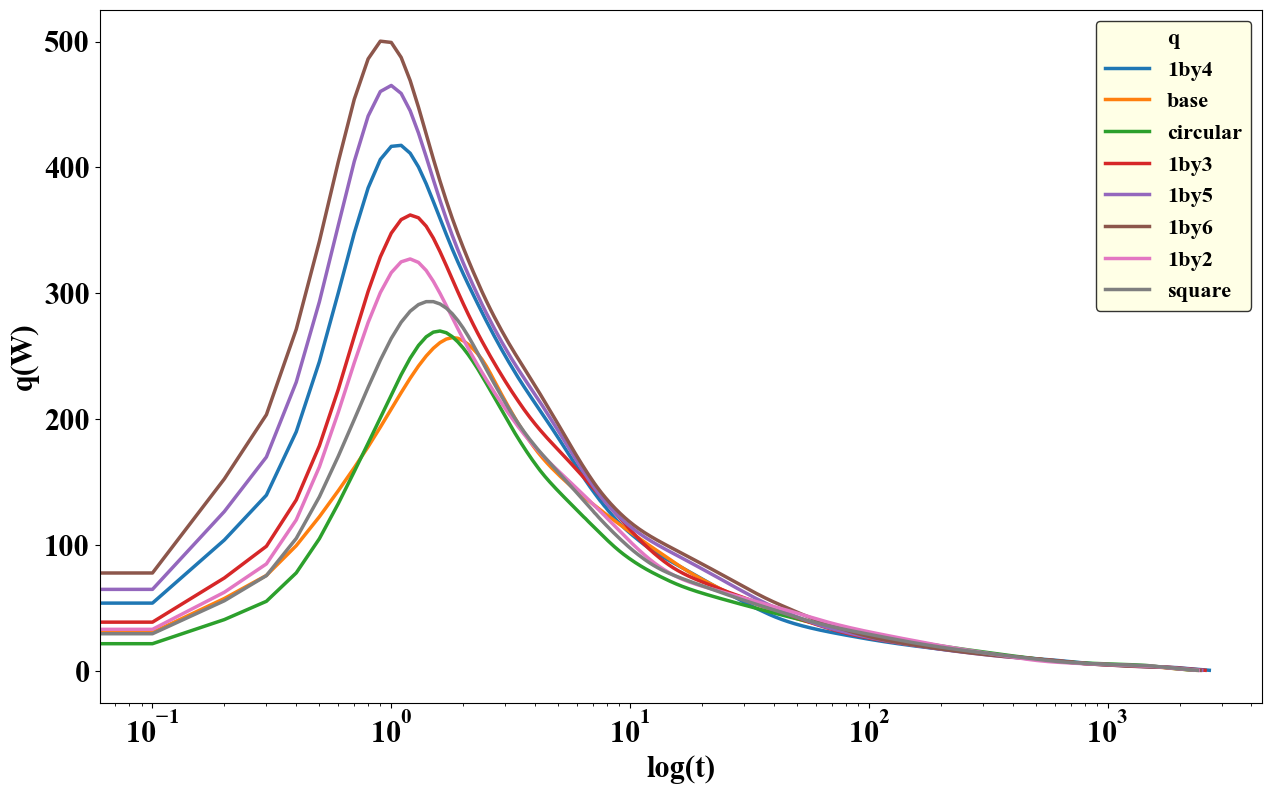

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn figure with custom size
plt.figure(figsize=(15, 9))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'bold'

# Plot the lines for different datasets
sns.lineplot(x=my_file3['flow-time'], 
             y=my_file3['heat-storage-rate'], 
             label='1by4',
             linewidth=2.5)

sns.lineplot(x=my_file2['flow-time'], 
             y=my_file2['heat-storage-rate-flux'], 
             label='base',
             linewidth=2.5)

sns.lineplot(x=my_file4['flow-time'], 
             y=my_file4['heat-storage-rate'], 
             label='circular',
             linewidth=2.5)

sns.lineplot(x=my_file5['flow-time'], 
             y=my_file5['heat-storage-rate'], 
             label='1by3',
             linewidth=2.5)

sns.lineplot(x=my_file6['flow-time'], 
             y=my_file6['heat-storage-rate'], 
             label='1by5',
             linewidth=2.5)

sns.lineplot(x=my_file7['flow-time'], 
             y=my_file7['heat-storage-rate'], 
             label='1by6',
             linewidth=2.5)

sns.lineplot(x=my_file8['flow-time'], 
             y=my_file8['heat-storage-rate'], 
             label='1by2',
             linewidth=2.5)

sns.lineplot(x=my_file9['flow-time'], 
             y=my_file9['heat-storage-rate'], 
             label='square',
             linewidth=2.5)



plt.xscale('log')
# Add title and labels
plt.xlabel(r'log(t)', fontweight='bold')
plt.ylabel('q(W)', fontweight='bold')

# Customize the legend
plt.legend(title='q', fontsize=16, title_fontsize= 16,facecolor='lightyellow', frameon=True, edgecolor='black')

plt.savefig('heat-storage-full.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


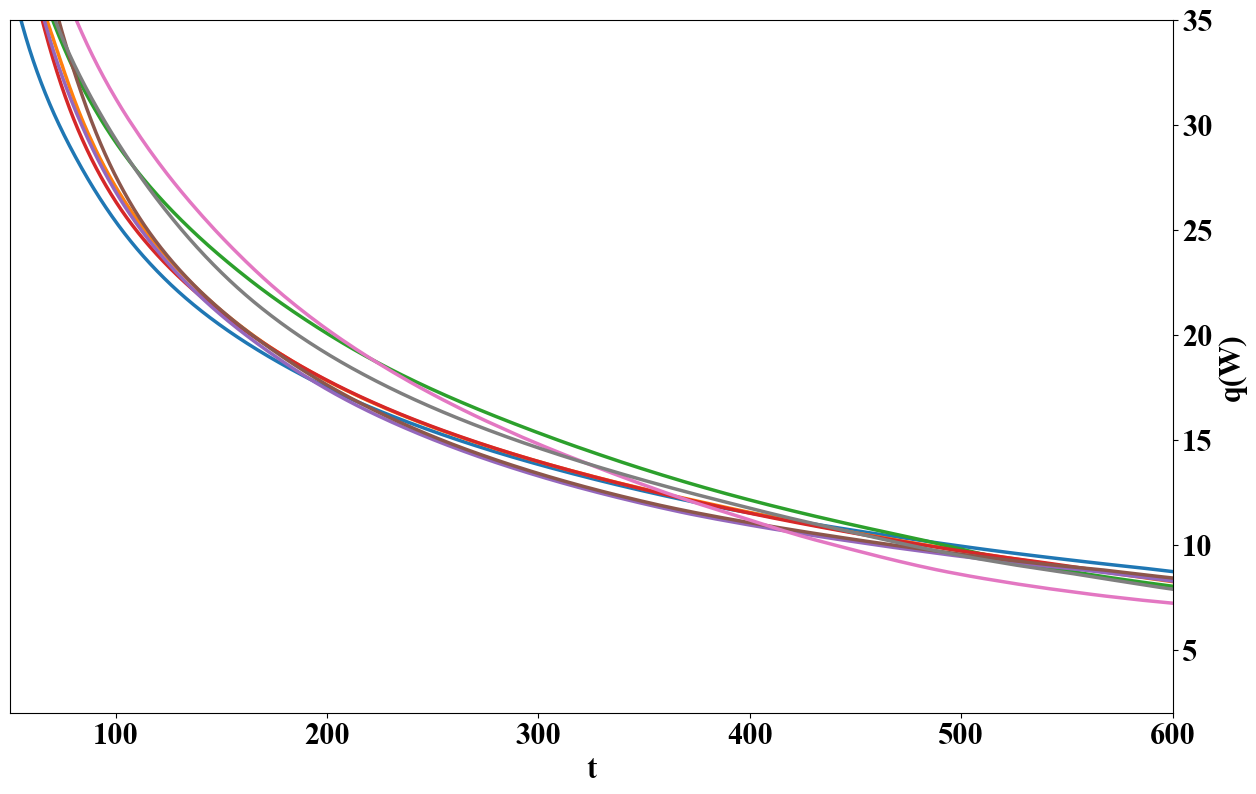

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn figure with custom size
plt.figure(figsize=(15, 9))

# Plot the lines for different datasets
sns.lineplot(x=my_file3['flow-time'], 
             y=my_file3['heat-storage-rate'], 
             label='1by4',
             linewidth=2.5)

sns.lineplot(x=my_file2['flow-time'], 
             y=my_file2['heat-storage-rate-flux'], 
             label='base',
             linewidth=2.5)

sns.lineplot(x=my_file4['flow-time'], 
             y=my_file4['heat-storage-rate'], 
             label='circular',
             linewidth=2.5)

sns.lineplot(x=my_file5['flow-time'], 
             y=my_file5['heat-storage-rate'], 
             label='1by3',
             linewidth=2.5)

sns.lineplot(x=my_file6['flow-time'], 
             y=my_file6['heat-storage-rate'], 
             label='1by5',
             linewidth=2.5)

sns.lineplot(x=my_file7['flow-time'], 
             y=my_file7['heat-storage-rate'], 
             label='1by6',
             linewidth=2.5)

sns.lineplot(x=my_file8['flow-time'], 
             y=my_file8['heat-storage-rate'], 
             label='1by2',
             linewidth=2.5)

sns.lineplot(x=my_file9['flow-time'], 
             y=my_file9['heat-storage-rate'], 
             label='square',
             linewidth=2.5)



# Move the y-axis to the right
plt.gca().yaxis.set_label_position('right')
plt.gca().yaxis.tick_right()

# Add title and labels

plt.xlabel('t', fontweight='bold')
plt.ylabel('q(W)', fontweight='bold')

# Customize the legend

plt.xlim(50, 600)
plt.ylim(2, 35)
plt.legend().remove()
plt.savefig('heat-storage-1.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


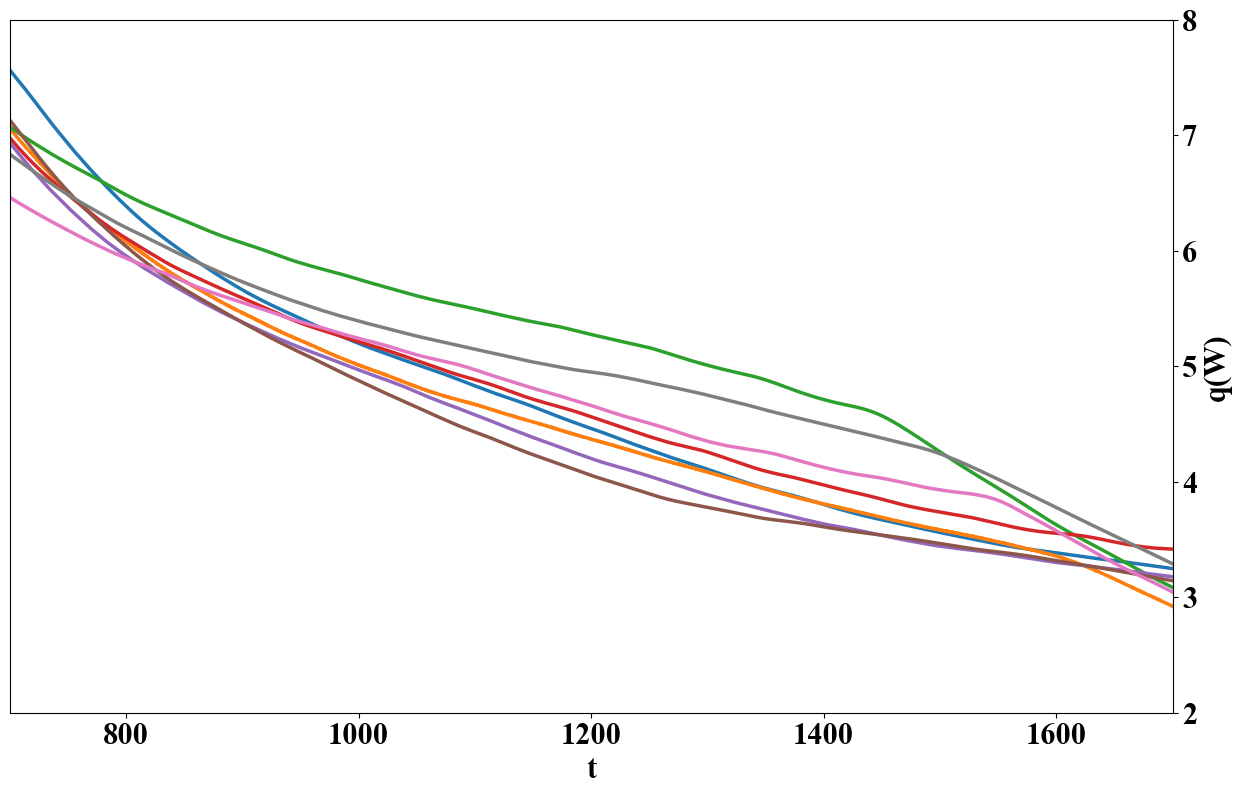

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn figure with custom size
plt.figure(figsize=(15, 9))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'bold'

# Plot the lines for different datasets
sns.lineplot(x=my_file3['flow-time'], 
             y=my_file3['heat-storage-rate'], 
             label='1by4-temp-uniformity',
             linewidth=2.5)

sns.lineplot(x=my_file2['flow-time'], 
             y=my_file2['heat-storage-rate-flux'], 
             label='base-temp-uniformity',
             linewidth=2.5)

sns.lineplot(x=my_file4['flow-time'], 
             y=my_file4['heat-storage-rate'], 
             label='circular-temp-uniformity',
             linewidth=2.5)

sns.lineplot(x=my_file5['flow-time'], 
             y=my_file5['heat-storage-rate'], 
             label='1by3-temp-uniformity',
             linewidth=2.5)

sns.lineplot(x=my_file6['flow-time'], 
             y=my_file6['heat-storage-rate'], 
             label='1by5-temp-uniformity',
             linewidth=2.5)

sns.lineplot(x=my_file7['flow-time'], 
             y=my_file7['heat-storage-rate'], 
             label='1by6-temp-uniformity',
             linewidth=2.5)

sns.lineplot(x=my_file8['flow-time'], 
             y=my_file8['heat-storage-rate'], 
             label='1by2-temp-uniformity',
             linewidth=2.5)

sns.lineplot(x=my_file9['flow-time'], 
             y=my_file9['heat-storage-rate'], 
             label='square-temp-uniformity',
             linewidth=2.5)

# Customize the background color


# Move the y-axis to the right
plt.gca().yaxis.set_label_position('right')
plt.gca().yaxis.tick_right()

plt.xlabel('t', fontweight='bold')
plt.ylabel('q(W)', fontweight='bold')
plt.legend().remove()
# Customize the legend

plt.xlim(700,1700)
plt.ylim(2, 8)
plt.savefig('heat-storage-2.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()
